<a href="https://colab.research.google.com/github/BautistaBertolami/Cap4630AI/blob/master/HW2/HW2BautistaBertolami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from mpl_toolkits import mplot3d

def f(x, y):
    return 50-pow(x, 2)-pow(y, 2)

def g(x, y):
    return pow(x, 2) + pow(y, 2)

def h(x, y):
    return np.sqrt(x*y) + 5

Maximum
using the equation \
$z = 50 - x^2 - y^2$ \
the maximum is at the point $(0, 0, 0)$

(0, 50)

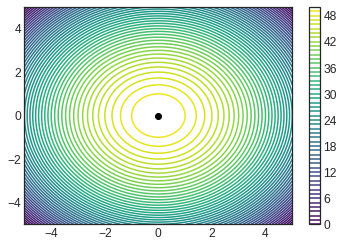

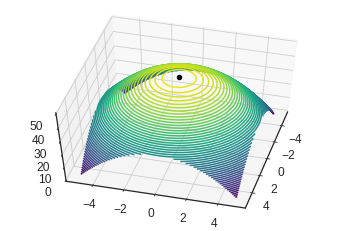

In [190]:
# First Equation showing a Maximum
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)
z = f(x, y)

plt.contour(x, y, z, 50, cmap = 'viridis')
plt.colorbar()
plt.scatter(0, 0, edgecolor = 'black', facecolor = 'black')

fig = plt.figure()
axs = plt.axes(projection = '3d')
axs.contour3D(x, y, z, 50, cmap = 'viridis')
axs.view_init(55, 15)
#Maximum
axs.scatter3D(0,0,50, edgecolor = 'black', facecolor = 'black')
axs.set_zlim(0, 50)

Minimum
using the equation \
$z = x^2 + y^2$ \
$the minimum is at the point (0, 0, 0)


(0, 50)

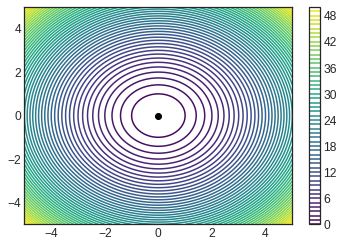

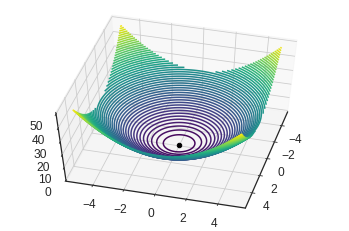

In [0]:
# Second Equation showing a Minimum

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)
z = g(x, y)

plt.contour(x, y, z, 50, cmap = 'viridis')
plt.colorbar()
plt.scatter(0, 0, edgecolor = 'black', facecolor = 'black')

fig = plt.figure()
axs = plt.axes(projection = '3d')
axs.contour3D(x, y, z, 50, cmap = 'viridis')
axs.view_init(55, 15)
#Minimum
axs.scatter3D(0,0,0, edgecolor = 'black', facecolor = 'black')
axs.set_zlim(0, 50)


Gradient of zero
using the equation \
$(z - 5)^2 = xy$ \
the non-minimum, non-maximum zero gradient is at the point $(0, 0, 5)$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


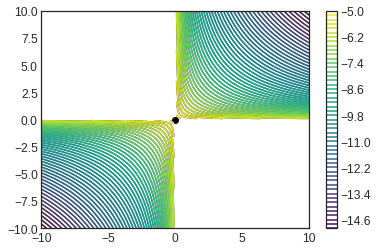

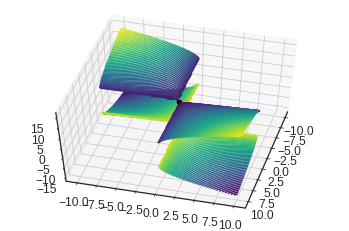

In [193]:
# Third Equation showing a Gradient of 0

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x, y)
z = h(x, y)
z2 = i(x,y)


plt.contour(x, y, z, 50, cmap = 'viridis')
plt.contour(x, y, z2, 50, cmap = 'viridis')
plt.colorbar()
plt.scatter(0, 0, edgecolor = 'black', facecolor = 'black')

fig = plt.figure()
axs = plt.axes(projection = '3d')
axs.contour3D(x, y, z, 50, cmap = 'viridis')
axs.contour3D(x, y, z2, 50, cmap = 'viridis')
axs.view_init(55, 15)

#Minimum
axs.scatter3D(0,0,5, edgecolor = 'black', facecolor = 'black')


Problem 2

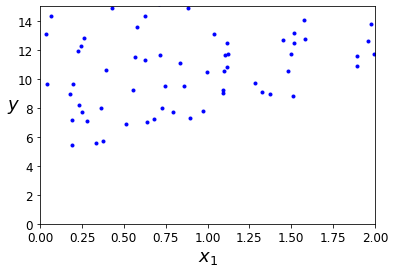

(100, 1)
[[1.89407198]
 [1.93471236]
 [0.36603089]
 [0.04407032]
 [1.44001608]]
(100, 2)
[[1.         1.89407198]
 [1.         1.93471236]
 [1.         0.36603089]
 [1.         0.04407032]
 [1.         1.44001608]]
[[1. 0.]
 [1. 2.]]
(2, 1)
(100, 1)
(100, 1)
(2, 1)


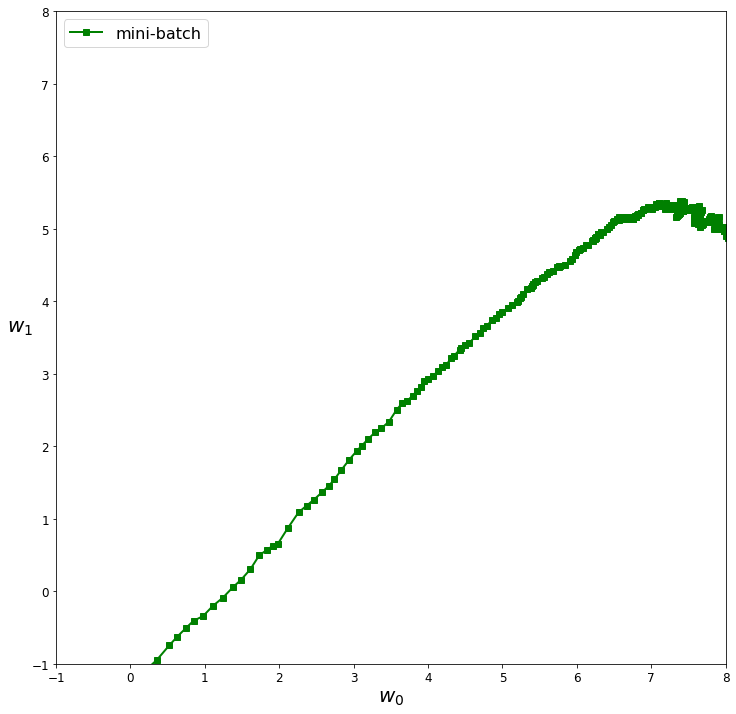

In [7]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
x_2 = 3 * np.random.rand(m, 1)
y = 4 + 3 * X + 4 * x_2 + np.random.rand(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

print(X.shape)

#show the first 5 rows
print(X[:5, :])

# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

print(X_b.shape)

# show the first 5 rows
print(X_b[:5, :])

# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
x2_new = np.array([[0], [2]])

# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

print(X_new_b)

# number of epochs
epochs = 20
# learning rate
lr = 0.01


np.random.seed(22)
initial_weight = np.random.randn(2, 1)


# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_mgd[-1]

weight_path_mgd = np.array(weight_path_mgd)

plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 8, -1, 8])
plt.show()







Problem 3 Displaying averages of MNIST numbers 0 - 5

0


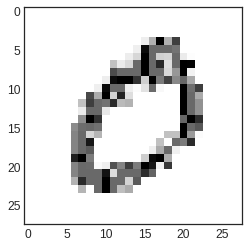

1


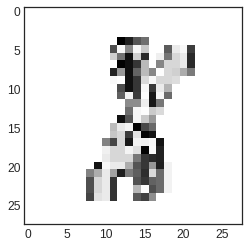

2


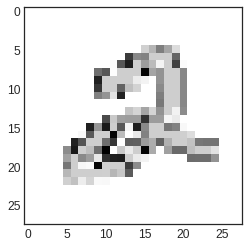

3


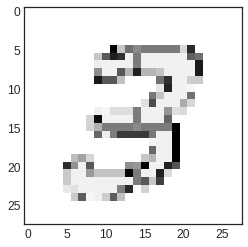

4


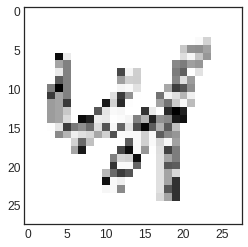

5


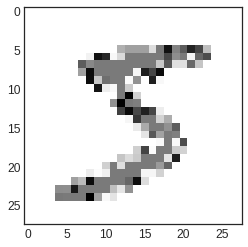

In [195]:
%tensorflow_version 2.x
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)  = tf.keras.datasets.mnist.load_data()


%matplotlib inline
import matplotlib.pyplot as plt

def numberAvg(num):
  count = 0

  avgImage = 0

  for n in train_labels:
    if train_labels[n] == num:
        avgImage = avgImage + train_images[n]
        count = count + 1

  print(num)
  plt.figure(figsize = (4, 4))
  plt.imshow(avgImage/count)
  plt.show()



#main
numberAvg(0)
numberAvg(1)
numberAvg(2)
numberAvg(3)
numberAvg(4)
numberAvg(5)
